In [1]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import cmath
from copy import copy
class node():
    def __init__(self,x,y,v):
        self.c = x+y*1j
        self.v = v



def mandelbrot( h,w, maxit=500 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.5:1.5:h*1j, -2:1:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in tqdm_notebook(range(maxit)):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime


Mandel = mandelbrot(500,500)
plt.imshow(Mandel)
plt.show()

nodes = np.zeros((6,6),dtype=object)

for x_values in range(2,8):
    for y_values in range(2,8):
        nodes[x_values-2][y_values-2]=node(50*x_values,50*y_values,Mandel[50*x_values,50*y_values])
        
fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)

copyNodes = np.ravel(nodes)
for mark in tqdm_notebook(copyNodes):
    plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')

plt.show()


def distance(z,w):
    return (z[0]-w[0])**2+(z[1]-w[1])**2
def findNbh(indexX,indexY,nodes):
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.c- nodes[indexX][indexY].c))
    return OrderedCopyNodes[:5]
def findBMU(indexX,indexY,nodes):
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.v- nodes[indexX][indexY].v))
    return OrderedCopyNodes[:5][1]
def limits(z):
    if z.real>499:
        valReal = 499
    elif z.real<0:
        valReal = 0
    else:
        valReal = z.real
    if z.imag>499:
        valImag = 499
    elif z.imag<0:
        valImag = 0
    else:
        valImag = z.imag
    return valReal+valImag*1j


numberOfIterations = 5

for iteration in tqdm_notebook(range(numberOfIterations)):
    for x_values in range(0,6):
        for y_values in range(0,6):
            BMUc = findBMU(x_values,y_values,nodes).c
            for nearNodes in findNbh(x_values,y_values,nodes):
                nearNodes.c  = limits(nearNodes.c + .03*2**(-iteration/20)*BMUc)
                nearNodes.v = Mandel[int(nearNodes.c.real)%500, int(nearNodes.c.imag)%500]
    Julia2 = copy(Mandel)
    fig = plt.figure()

    ax = fig.add_axes([0., 0., 1., 1., ])
    # Hide grid lines
    ax.grid(False)
    ax.axis('off')
    # Hide axes ticks

    plt.imshow(Julia2)

    copyNodes = np.ravel(nodes)
    for mark in copyNodes:
        plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')
    plt.show()

In this exercise we are going to place 100 points in the map:

In [2]:

def mandelbrot( h,w, maxit=500 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.5:1.5:h*1j, -2:1:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in tqdm_notebook(range(maxit)):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime


And they will cluster around the more colorful points using SOM.

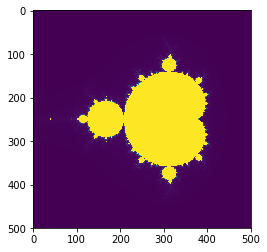

In [3]:
Mandel = mandelbrot(500,500)
plt.imshow(Mandel)
plt.show()

In [15]:
#points = []
class node():
    def __init__(self,x,y,v):
        self.c = x+y*1j
        self.v = v


In [16]:
nodes = np.zeros((6,6),dtype=object)

for x_values in range(2,8):
    for y_values in range(2,8):
        nodes[x_values-2][y_values-2]=node(50*x_values,50*y_values,Mandel[50*x_values,50*y_values])
        #Here the first copy is the colors, an the second the coordinates

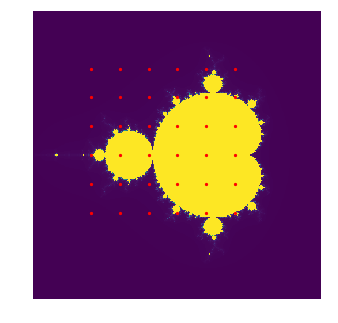

In [17]:
fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)

copyNodes = np.ravel(nodes)
for mark in tqdm_notebook(copyNodes):
    plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')

plt.show()

In [18]:
def distance(z,w):
    return (z[0]-w[0])**2+(z[1]-w[1])**2
def findNbh(indexX,indexY,nodes):
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.c- nodes[indexX][indexY].c))
    return OrderedCopyNodes[:5]
def findBMU(indexX,indexY,nodes):
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.v- nodes[indexX][indexY].v))
    return OrderedCopyNodes[:5][1]
def limits(z):
    if z.real>499:
        valReal = 499
    elif z.real<0:
        valReal = 0
    else:
        valReal = z.real
    if z.imag>499:
        valImag = 499
    elif z.imag<0:
        valImag = 0
    else:
        valImag = z.imag
    return valReal+valImag*1j

In [19]:

numberOfIterations = 5

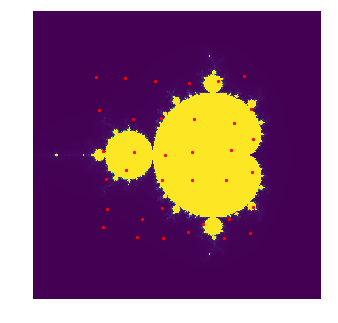

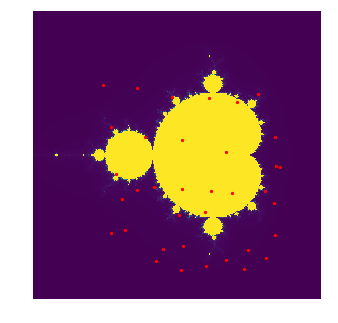

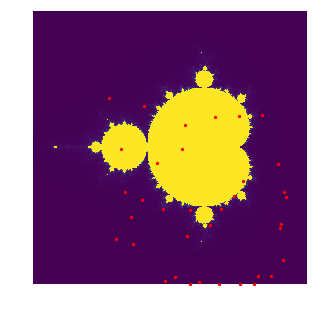

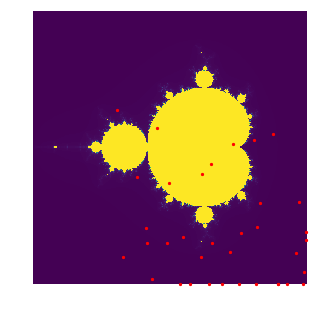

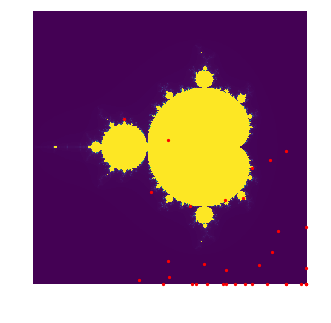

In [20]:
for iteration in tqdm_notebook(range(numberOfIterations)):
    for x_values in range(0,6):
        for y_values in range(0,6):
            BMUc = findBMU(x_values,y_values,nodes).c
            for nearNodes in findNbh(x_values,y_values,nodes):
                nearNodes.c  = limits(nearNodes.c + .03*2**(-iteration/20)*BMUc)
                #newX, newY= newCoord.real, newCoord.imag  #int(newCoord.real)%500, int(newCoord.imag)%500
                #nearNodes.c = newX + newY*1j            
                #nearNodes.c = nearNodes.c + .1*BMUc
                nearNodes.v = Mandel[int(nearNodes.c.real)%500, int(nearNodes.c.imag)%500]
    Julia2 = copy(Mandel)
    fig = plt.figure()

    ax = fig.add_axes([0., 0., 1., 1., ])
    # Hide grid lines
    ax.grid(False)
    ax.axis('off')
    # Hide axes ticks

    plt.imshow(Julia2)

    copyNodes = np.ravel(nodes)
    for mark in copyNodes:
        plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')
    plt.show()
